In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

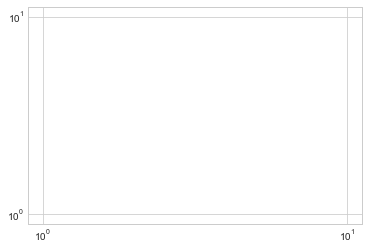

In [4]:
ax = plt.axes(xscale='log', yscale='log')

In [5]:
print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_minor_locator())

print(ax.xaxis.get_major_formatter())
print(ax.xaxis.get_minor_formatter())

# 隐藏刻度与标签

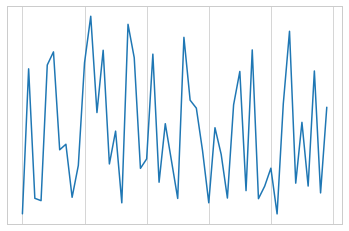

In [6]:
ax = plt.axes()
ax.plot(np.random.rand(50))

ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

(400, 64, 64)


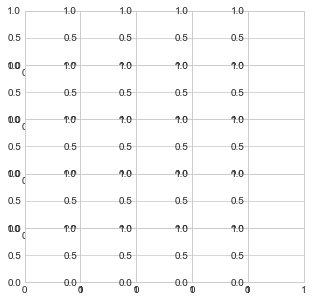

In [22]:
fig, ax = plt.subplots(5, 5, figsize=(5, 5))
fig.subplots_adjust(hspace=0, wspace=0)

# 从sklearn获取一些人脸图片
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images
print(faces.shape)

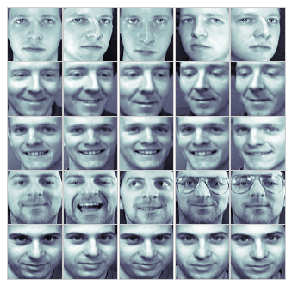

In [26]:
for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[20*i + j], cmap='bone')
fig

# 增减刻度数量

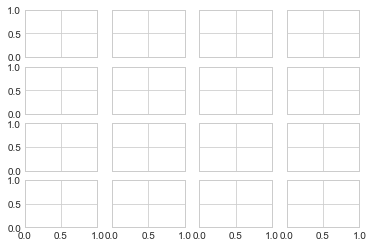

In [29]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)


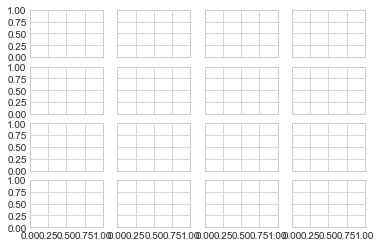

In [32]:
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(4))
    axi.yaxis.set_major_locator(plt.MaxNLocator(4))
fig

(0, 9.42477796076938)

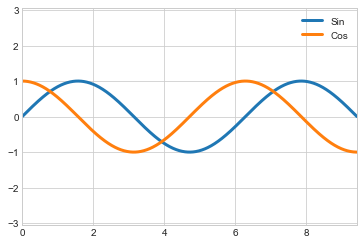

In [33]:
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sin')
ax.plot(x, np.cos(x), lw=3, label='Cos')

ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi)

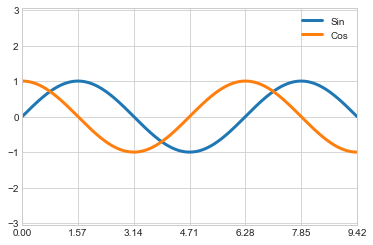

In [34]:
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
fig

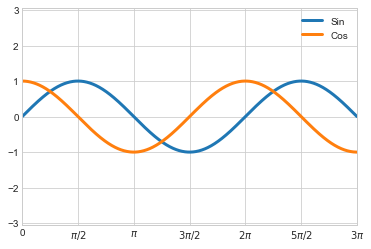

In [35]:
# 自定义函数，用来设置不同刻度标签的显示
def format_func(value, tick_number):
    # 找到pi/2的倍数刻度
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return '0'
    elif N == 1:
        return r'$\pi/2$'
    elif N == 2:
        return r'$\pi$'
    elif N % 2 > 0:
        return r'${0}\pi/2$'.format(N)
    else:
        return r'${0}\pi$'.format(N // 2)
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig